In [138]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [139]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [140]:
#improt relevant libraries
import pandas as pd
import seaborn as sns

In [141]:
df = pd.read_csv('/Users/guyuhui/Desktop/midterm_data.csv')

In [142]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [144]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


For data cleaning process, first, we should check if there are any rows where all columns have a missing data point, these rows we should drop immediately.

In [145]:
#clean data
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [146]:
#drop row 2130
df.drop([2130], axis=0, inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


Next we can fill in missing device and location data with "Other". First, we'll make a copy of our DataFrame because we want to test the output of this approach.

In [148]:
#make a copy of the DataFrame
df_test = df.copy()

In [149]:
# Obtain descriptive statistics by decive
df_test.groupby('device').describe()

userID                                                           \
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75   
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0   
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [150]:
# Fill in missing device data with "Other" 
df_test['device'] = df_test['device'].fillna('Other')

In [151]:
df_test.groupby('device').describe()

userID                                                            \
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75   
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0   
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [152]:
#Obtain descriptive statistics by location
df_test['location'] = df_test['location'].fillna('other')

In [153]:
df_test.groupby('location').describe()

userID                                                           \
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5   
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status  \
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0   
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

In [154]:
df_test.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.573915,41.542509,5.027205,25.159160,5.774355,14.965593,149.424353,0.272454
std,1443.654943,14.040833,2.595218,9.826407,2.571097,6.046672,68.705704,0.445267
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1250.500000,29.000000,3.000000,18.267083,4.000000,10.000000,92.465000,0.000000
50%,2501.000000,42.000000,5.000000,25.036202,6.000000,15.000000,143.340000,0.000000
75%,3750.500000,54.000000,7.000000,32.001153,8.000000,20.000000,198.330000,1.000000
max,5000.000000,65.000000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


In the above, we comparing the characteristics of the "Other" device and location with the remaining device and location. It seems that the statistics are quite similar. The mean, standard deviation, distribution, median, and quartiles are in and around what the other device and location have. It seems there isn't much bias in our data.

In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4999 non-null   object 
 9   location         4999 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


To check outliers, we can use box plot.

<Axes: ylabel='time_spent'>

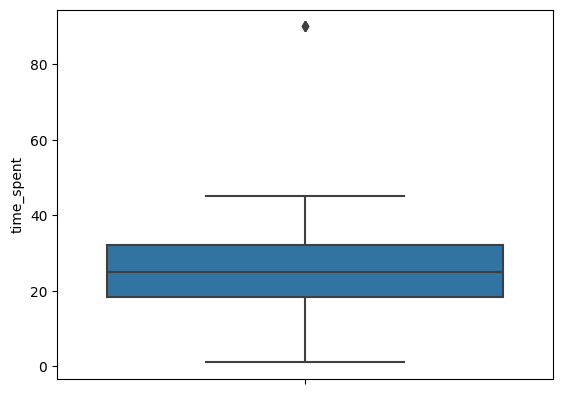

In [156]:
#outliers for time_spent
sns.boxplot(data = df_test, y='time_spent')

It seems that the time spent column has outliers, but they all above 60. We can drop these observations.
Then we can do the same step for cart value.

In [163]:
# Find index values of observations above 60
drop_time_outliers = df_test[df_test['time_spent']>60].index
drop_time_outliers

Index([284, 2494, 2833, 3957], dtype='int64')

In [164]:
df_test.drop(drop_time_outliers, inplace=True)

In [165]:
# 4 entries dropped with 4995 left
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4995 non-null   int64  
 1   age              4995 non-null   int64  
 2   sessions         4995 non-null   int64  
 3   time_spent       4995 non-null   float64
 4   pages_visited    4995 non-null   int64  
 5   cart_items       4995 non-null   int64  
 6   cart_value       4995 non-null   float64
 7   checkout_status  4995 non-null   int64  
 8   device           4995 non-null   object 
 9   location         4995 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


<Axes: ylabel='cart_value'>

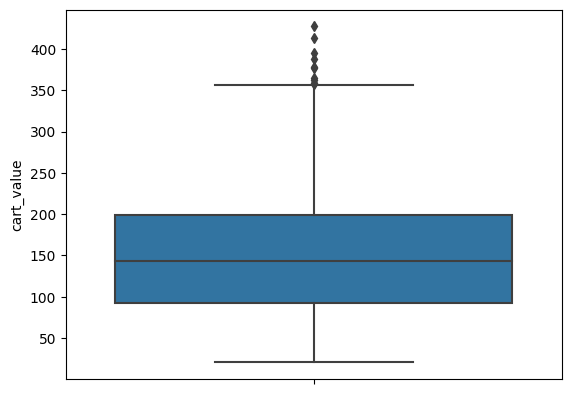

In [166]:
#outliers for cart_value
sns.boxplot(data = df_test, y='cart_value')

In [167]:
# Find index values of observations above 60
drop_cart_outliers = df_test[df_test['cart_value']>360].index
drop_cart_outliers

Index([263, 445, 1268, 1479, 2615, 2664, 2769, 3200], dtype='int64')

In [168]:
df_test.drop(drop_cart_outliers, inplace=True)

In [169]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4987 non-null   int64  
 1   age              4987 non-null   int64  
 2   sessions         4987 non-null   int64  
 3   time_spent       4987 non-null   float64
 4   pages_visited    4987 non-null   int64  
 5   cart_items       4987 non-null   int64  
 6   cart_value       4987 non-null   float64
 7   checkout_status  4987 non-null   int64  
 8   device           4987 non-null   object 
 9   location         4987 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 428.6+ KB


Finally, we can drop any duplicate entries.

In [170]:
#drop duplicates
df_test.drop_duplicates(inplace=True)

In [171]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4987 non-null   int64  
 1   age              4987 non-null   int64  
 2   sessions         4987 non-null   int64  
 3   time_spent       4987 non-null   float64
 4   pages_visited    4987 non-null   int64  
 5   cart_items       4987 non-null   int64  
 6   cart_value       4987 non-null   float64
 7   checkout_status  4987 non-null   int64  
 8   device           4987 non-null   object 
 9   location         4987 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 428.6+ KB


<Axes: xlabel='time_spent', ylabel='Count'>

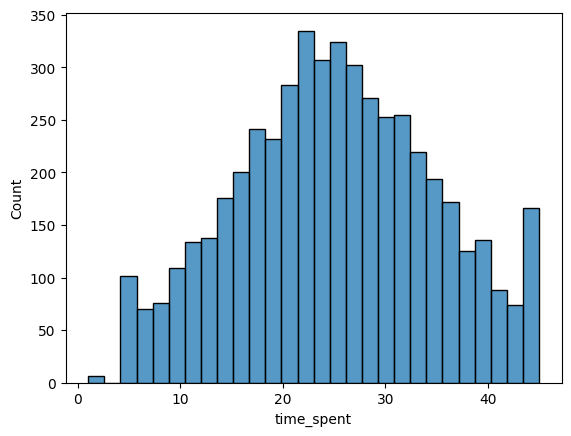

In [172]:
#data exploration
sns.histplot(df_test['time_spent'])

In [177]:
from scipy import stats
print(stats.skew(df_test['time_spent']))
print(stats.kurtosis(df_test['time_spent']))

0.006178683402456276
-0.5743335138662866


<Axes: xlabel='cart_value', ylabel='Count'>

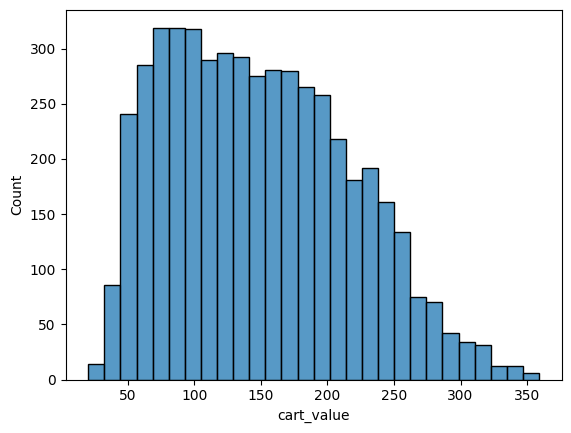

In [175]:
sns.histplot(df_test['cart_value'])

In [176]:
print(stats.skew(df_test['cart_value']))
print(stats.kurtosis(df_test['cart_value']))

0.4020934095812169
-0.5934894311144747


We can see histogram plot for time spent seems fairly normal, with average time spent around 22. The skew for time spent is 0.006, which is fairly close to 0 and supports the result of normal distribution. Then we calculate kurtosis since the distribution is normal. The kurtosis of time spent is -0.57, which indicates a slightly Platykurtic distribution and also represent less volatility.

The histogram plot for cart value is nearly normal but it appears a little right skewed. This means that most people's cart value are on the lower side, with some people's cart valueon the more expensive side. 
The skew for time spent is 0.4, which support our digram that it's a little right skew.

In [179]:
#time spent analysis
time_by_checkout = df_test.groupby('checkout_status')['time_spent'].aggregate(['sum','mean','median','count'])
time_by_checkout

,sum,mean,median,count
checkout_status,,,,
0,82558.602689,22.774787,21.625771,3625
1,42655.004545,31.317918,30.943031,1362


<Axes: xlabel='checkout_status'>

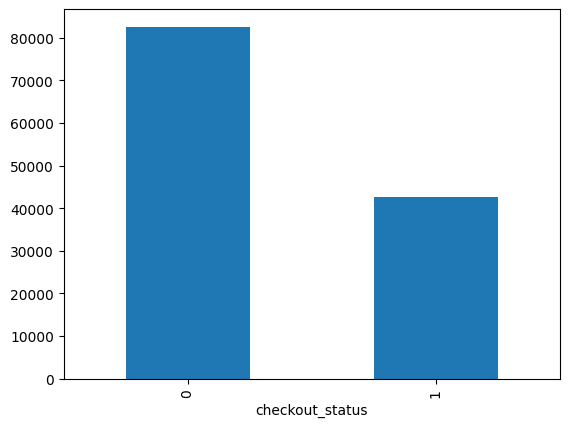

In [180]:
time_by_checkout['sum'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='checkout_status'>

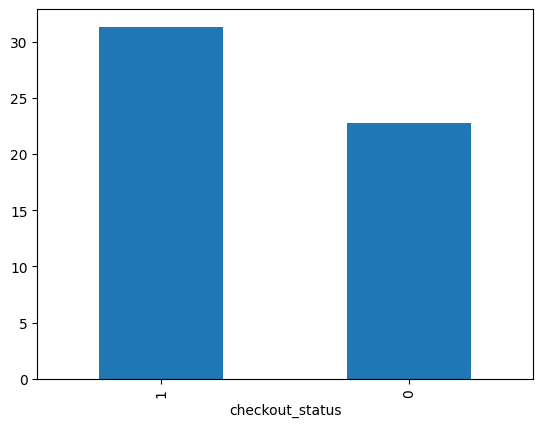

In [181]:
time_by_checkout['mean'].sort_values(ascending=False).plot(kind='bar')

People who check out appears to spend more time on browsing the website, which mean value around 31 minutes.
On the other hand, People who didn't check out appears to spend more time on browsing the website, which mean value around  minutes.

In [182]:
#cart value
cart_by_checkout = df_test.groupby('checkout_status')['cart_value'].aggregate(['sum','mean','median','count'])
cart_by_checkout

,sum,mean,median,count
checkout_status,,,,
0,551446.41,152.123148,146.91,3625
1,191802.58,140.824214,136.29,1362


<Axes: xlabel='checkout_status'>

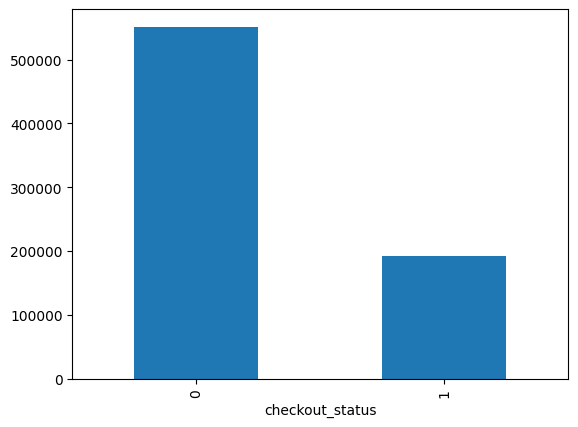

In [185]:
cart_by_checkout['sum'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='checkout_status'>

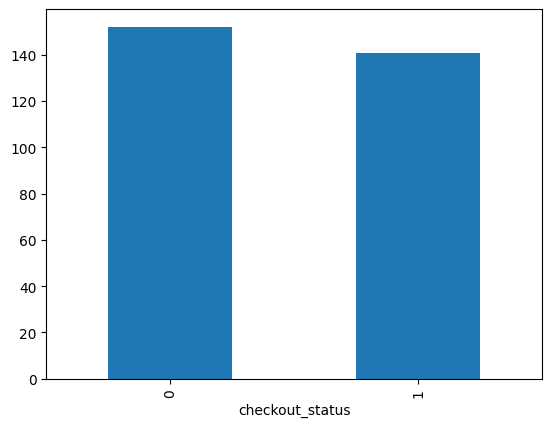

In [186]:
cart_by_checkout['mean'].sort_values(ascending=False).plot(kind='bar')

People who check out appears to have less cart value, which mean value around 140 minutes.
On the other hand, people who didn't check out appears to have more cart value, which mean value around 152 minutes.

In [198]:
cart_by_item = df_test.groupby('cart_items')['cart_value'].aggregate(['sum','mean','median','count'])
cart_by_item.head()

,sum,mean,median,count
cart_items,,,,
5,11900.64,50.426441,50.680,236
6,13467.38,59.067456,59.425,228
7,18043.04,70.757020,70.900,255
8,18066.29,77.871940,78.795,232
9,22304.51,91.038816,90.300,245


<Axes: xlabel='cart_items'>

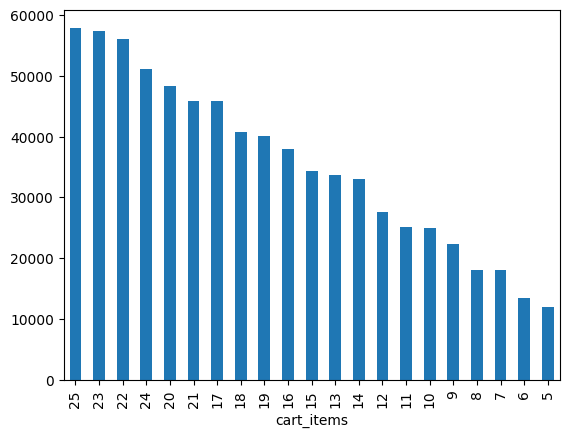

In [199]:
cart_by_item['sum'].sort_values(ascending=False).plot(kind='bar')

In [200]:
cart_by_page = df_test.groupby('pages_visited')['cart_value'].aggregate(['sum','mean','median','count'])
cart_by_page.head()

,sum,mean,median,count
pages_visited,,,,
1,39497.57,141.568351,131.56,279
2,45464.57,149.554507,147.52,304
3,61777.89,154.059576,143.20,401
4,90346.81,150.578017,146.81,600
5,110292.64,150.673005,144.51,732


<Axes: xlabel='pages_visited'>

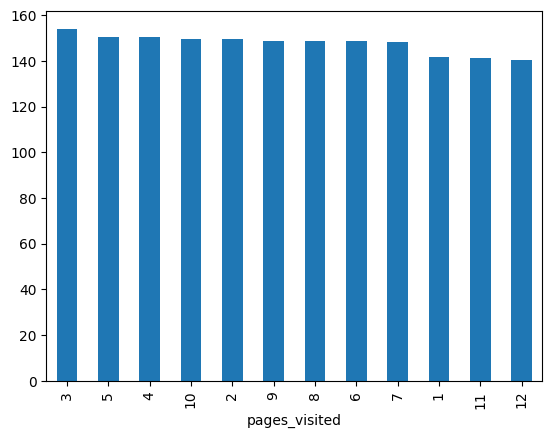

In [205]:
cart_by_page['mean'].sort_values(ascending=False).plot(kind='bar')

In [202]:
time_by_item = df_test.groupby('cart_items')['time_spent'].aggregate(['sum','mean','median','count'])
time_by_item.head()

,sum,mean,median,count
cart_items,,,,
5,5793.237745,24.547618,24.754783,236
6,5807.778959,25.472715,25.132804,228
7,6281.936740,24.635046,23.686768,255
8,5863.787114,25.274944,24.357088,232
9,6237.132979,25.457686,26.002611,245


<Axes: xlabel='cart_items'>

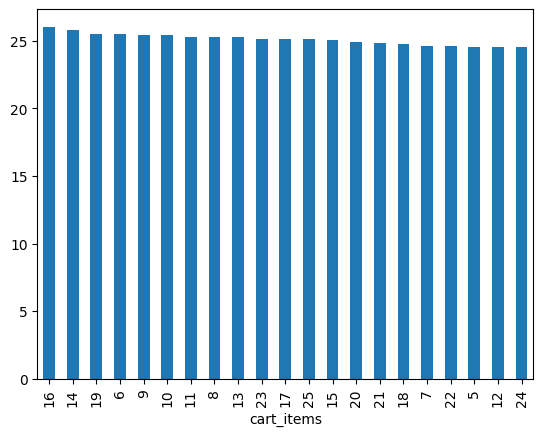

In [204]:
time_by_item['mean'].sort_values(ascending=False).plot(kind='bar')

In summary, to increase sales, it is important to address the lower cart value of people who check out compared to those who don't. To achieve this, implementing price reductions or discounts can be effective in attracting more customers to complete their purchases. Furthermore, it is observed that the number of products added and the number of pages viewed by customers are similar. Therefore, adjusting the price is deemed the most effective approach to drive sales growth.